**UNSUPERVISED MACHINE LEARNING FOR CUSTOMER MARKET SEGMENTATION**

In [1]:
pip install jupyterthemes==0.16.1

     |████████████████████████████████| 6.0MB 3.2MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 


IMPORT PACKAGES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ANALYZING DATA

In [3]:
creditcard_df=pd.read_csv('marketing_data.csv')
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
print('Average,min,max=',creditcard_df['BALANCE'].mean(),creditcard_df['BALANCE'].min(),creditcard_df['BALANCE'].max())

Average,min,max= 1564.4748276781038 0.0 19043.13856


In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']== 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [9]:
creditcard_df[creditcard_df['CASH_ADVANCE']== 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [10]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [12]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [14]:
creditcard_df.duplicated().sum()

0

In [15]:
creditcard_df.drop('CUST_ID',axis= 1,inplace=True)

DATA VISUALIZATION

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


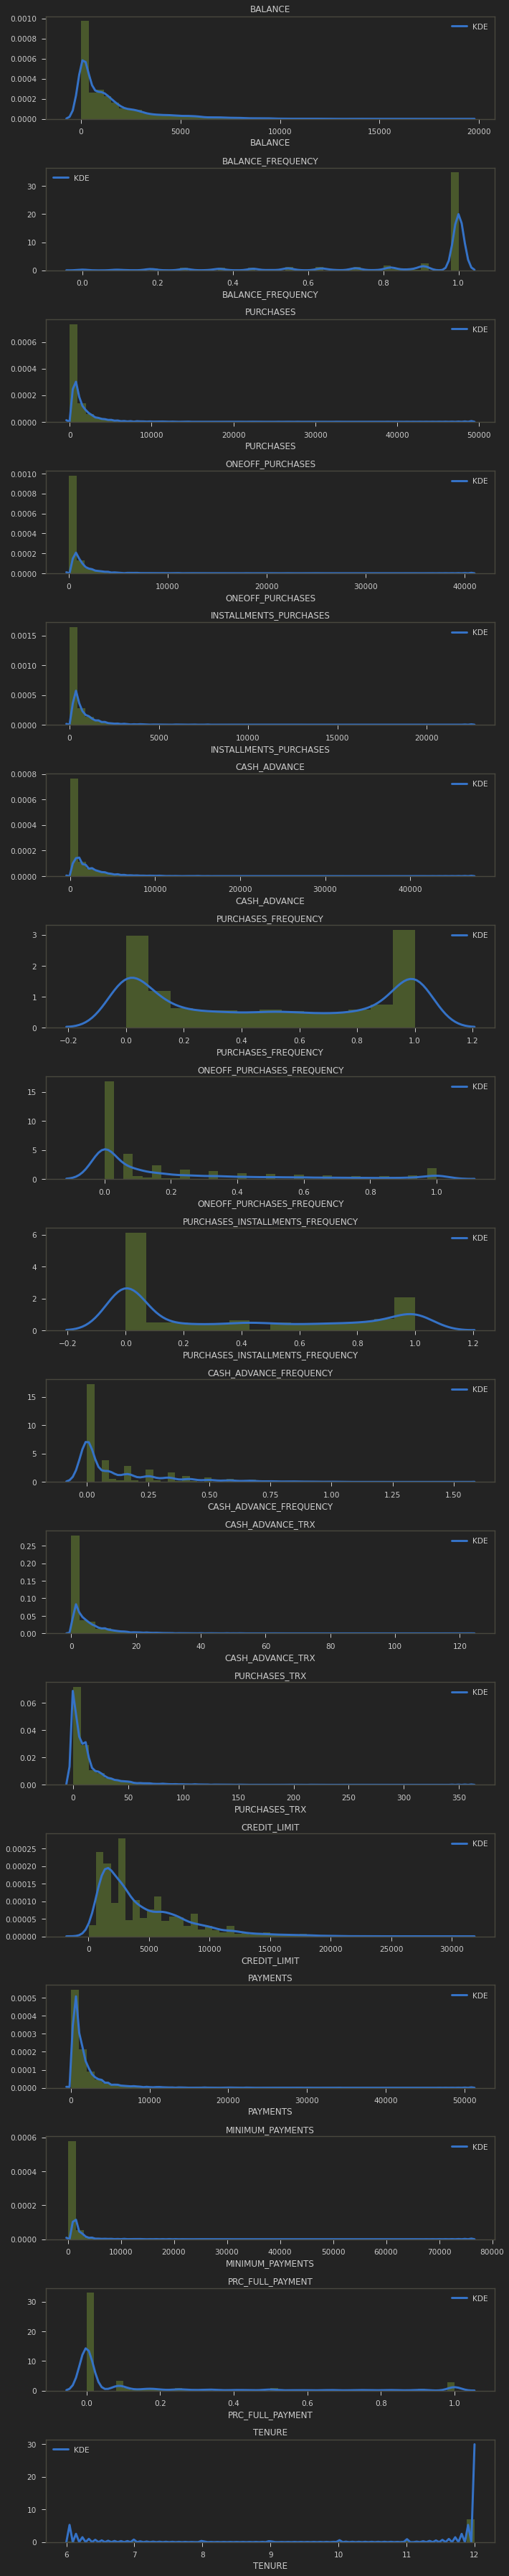

In [16]:
plt.figure(figsize= (10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color":"b", "lw":3,"label": "KDE"},hist_kws={"color":"g"})
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


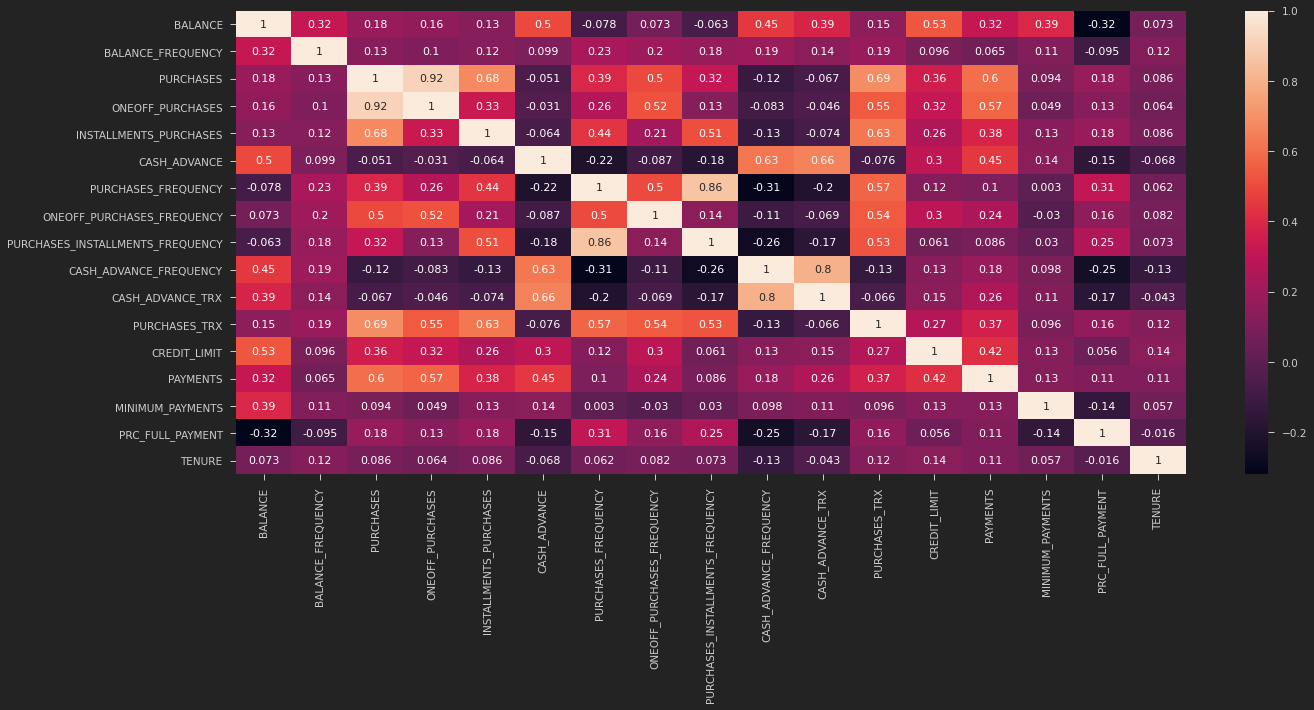

In [17]:
correlations=creditcard_df.corr()
f,ax =plt.subplots(figsize= (20,10))
sns.heatmap(correlations, annot = True)

DATA PREPROCESSING

In [18]:
scaler=StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [19]:
creditcard_df_scaled.shape

(8950, 17)

K-MEANS CLUSTTERING

In [20]:
scores=[]
range_val = range(1,20)

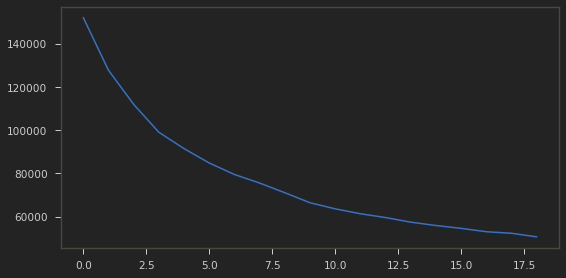

In [22]:
for i in range_val:
    kmeans=KMeans(n_clusters =i)
    kmeans.fit(creditcard_df_scaled)
    scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')

In [23]:
kmeans=KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [24]:
kmeans.cluster_centers_.shape

(7, 17)

In [25]:
cluster_centers= pd.DataFrame(data= kmeans.cluster_centers_, columns= [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.145081,0.430858,0.975623,0.924330,0.608669,-0.306508,1.101100,1.880802,0.549180,-0.405640,-0.315439,1.231054,0.721897,0.413901,-0.029766,0.471069,0.307220
1,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
2,-0.701687,-2.132994,-0.307190,-0.230859,-0.302103,-0.322279,-0.547889,-0.429265,-0.441194,-0.520756,-0.375750,-0.416524,-0.173139,-0.201691,-0.257516,0.296865,0.202307
3,0.006327,0.403441,-0.341332,-0.221794,-0.399491,-0.105517,-0.806475,-0.330626,-0.752795,0.082744,-0.042529,-0.462745,-0.300301,-0.248037,-0.016496,-0.451924,0.272059
4,1.488505,0.403475,7.413638,6.553369,5.486972,0.028557,1.072872,1.875094,1.028264,-0.309559,-0.107750,4.914457,2.259343,5.133194,0.782295,0.828775,0.330386
5,1.669094,0.392669,-0.197920,-0.148620,-0.195034,1.991137,-0.452772,-0.188318,-0.400400,1.906125,1.921061,-0.236277,1.009073,0.836864,0.587828,-0.390993,0.070132
6,-0.369437,0.331848,-0.039802,-0.231967,0.331879,-0.367837,0.980804,-0.346537,1.171089,-0.477230,-0.362620,0.173108,-0.275644,-0.222418,-0.030000,0.303116,0.252684


In [26]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data= cluster_centers,columns= [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1866.448556,0.979337,3087.638418,2126.635564,961.479801,336.109458,0.932275,0.763537,0.582696,0.053972,1.096184,45.309221,7121.007371,2931.345691,794.838215,0.291494,11.928458
1,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
2,103.972468,0.371984,346.889134,209.258713,137.880042,303.037455,0.270456,0.074400,0.189096,0.030936,0.684609,4.356602,3864.499112,1149.266895,264.075484,0.240543,11.788057
3,1577.643243,0.972842,273.943975,224.304358,49.813260,757.597735,0.166673,0.103826,0.065257,0.151702,2.958596,3.207719,3401.830409,1015.101038,825.764419,0.021535,11.881404
4,4662.671853,0.972850,16842.556892,11469.688108,5372.868784,1038.757441,0.920946,0.761835,0.773096,0.073198,2.513514,136.864865,12714.864865,16593.236130,2687.311037,0.396117,11.959459
5,5038.552404,0.970290,580.345844,345.758223,234.701218,5154.377399,0.308631,0.146279,0.205308,0.516579,16.358659,8.836872,8165.871001,4155.783113,2234.115193,0.039356,11.611173
6,795.523851,0.955882,918.166808,207.419489,711.182005,207.499575,0.883995,0.099079,0.829858,0.039646,0.774209,19.012652,3491.542677,1089.264949,794.293776,0.242371,11.855474


In [28]:
labels.shape



(8950,)

In [29]:
y_kmeans= kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([1, 2, 3, ..., 0, 1, 1], dtype=int32)

In [30]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


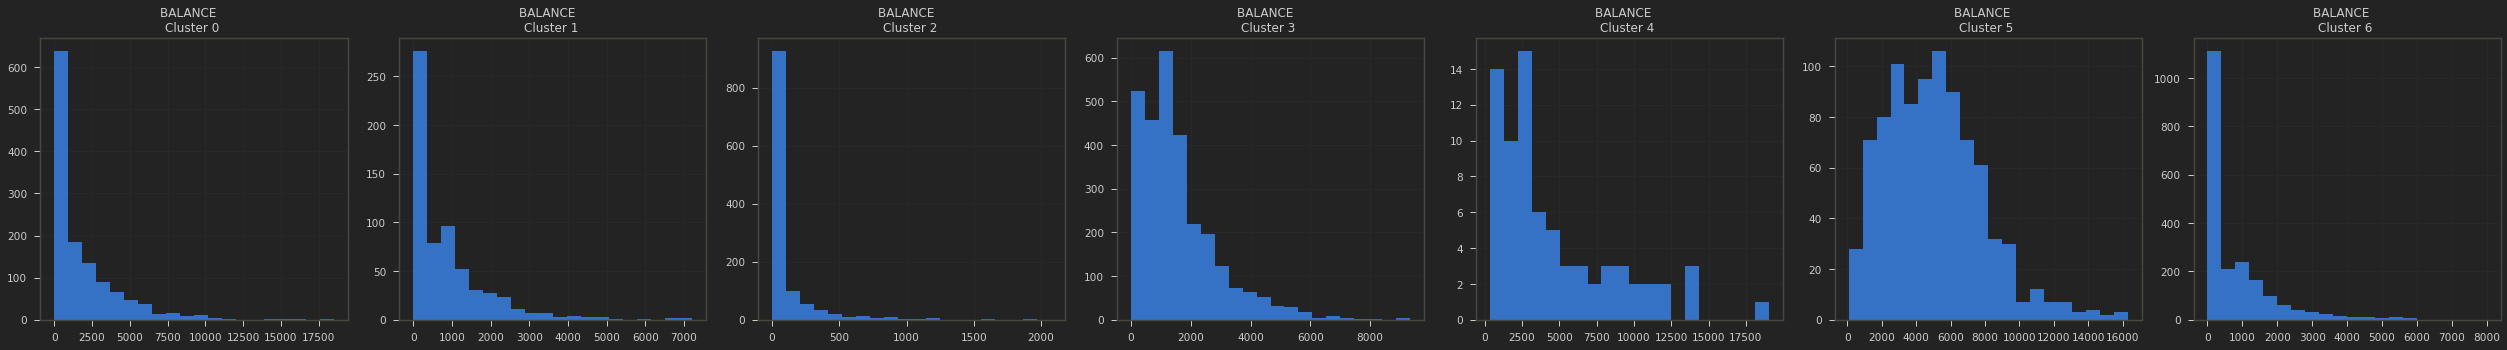

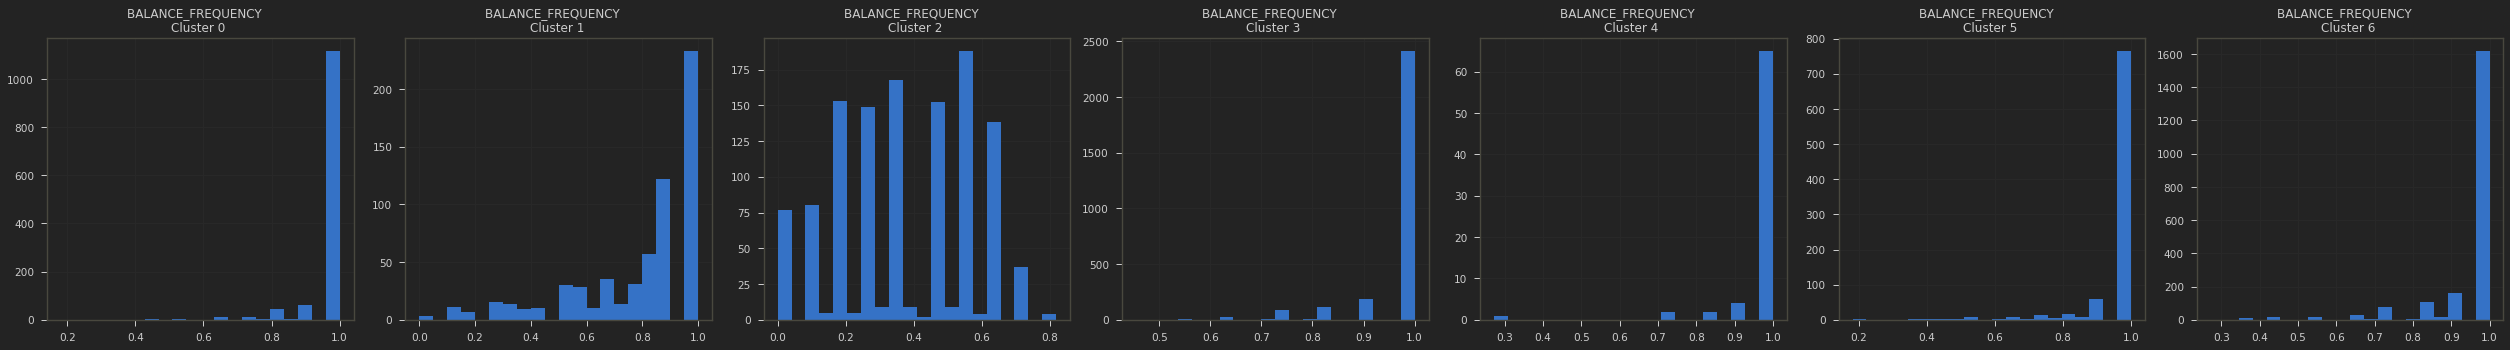

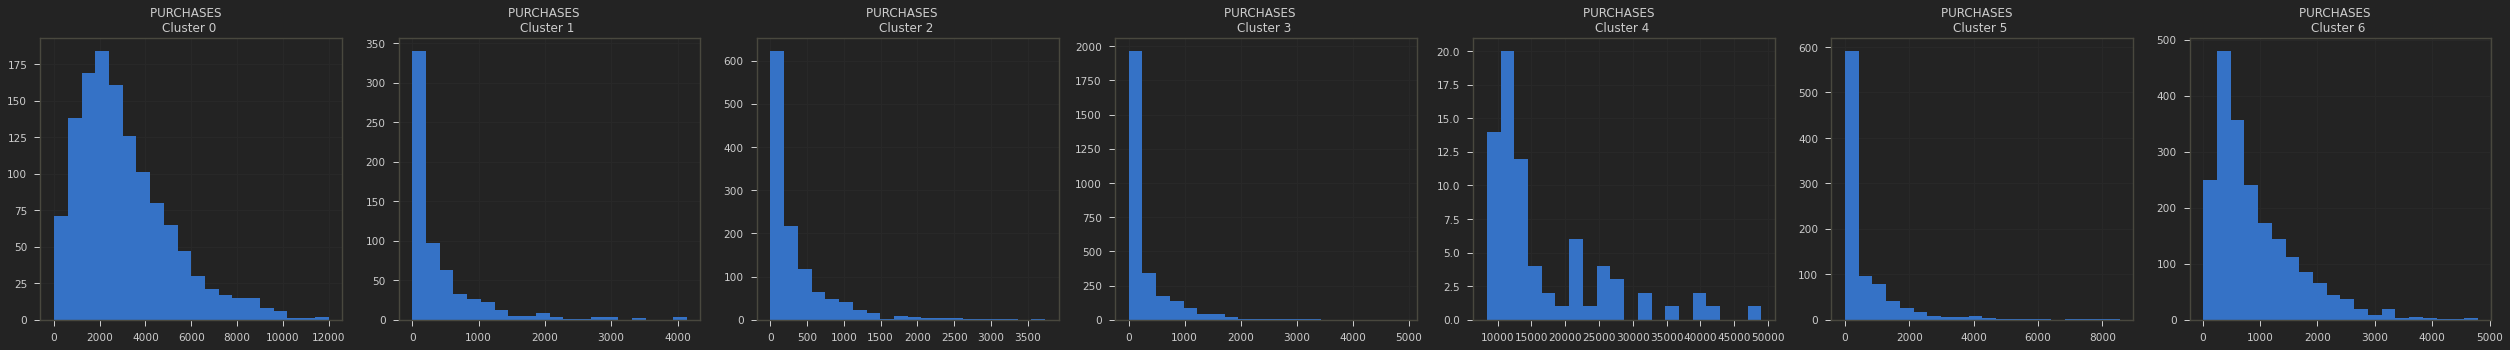

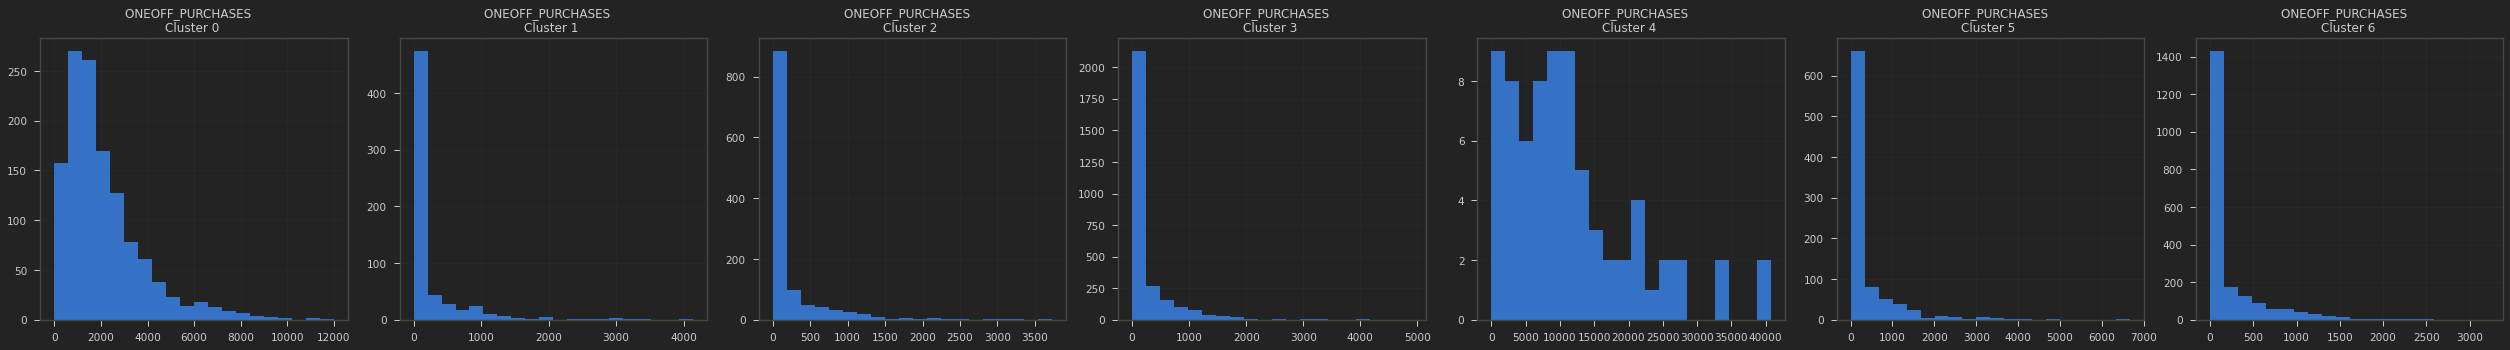

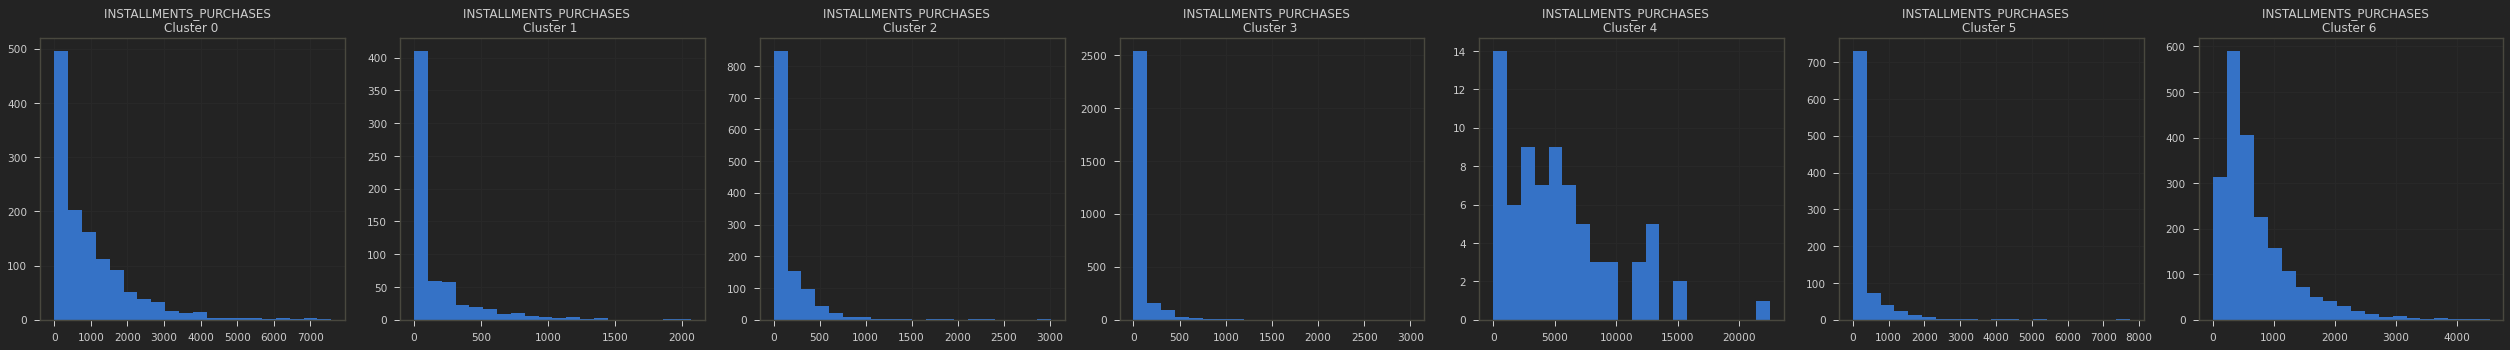

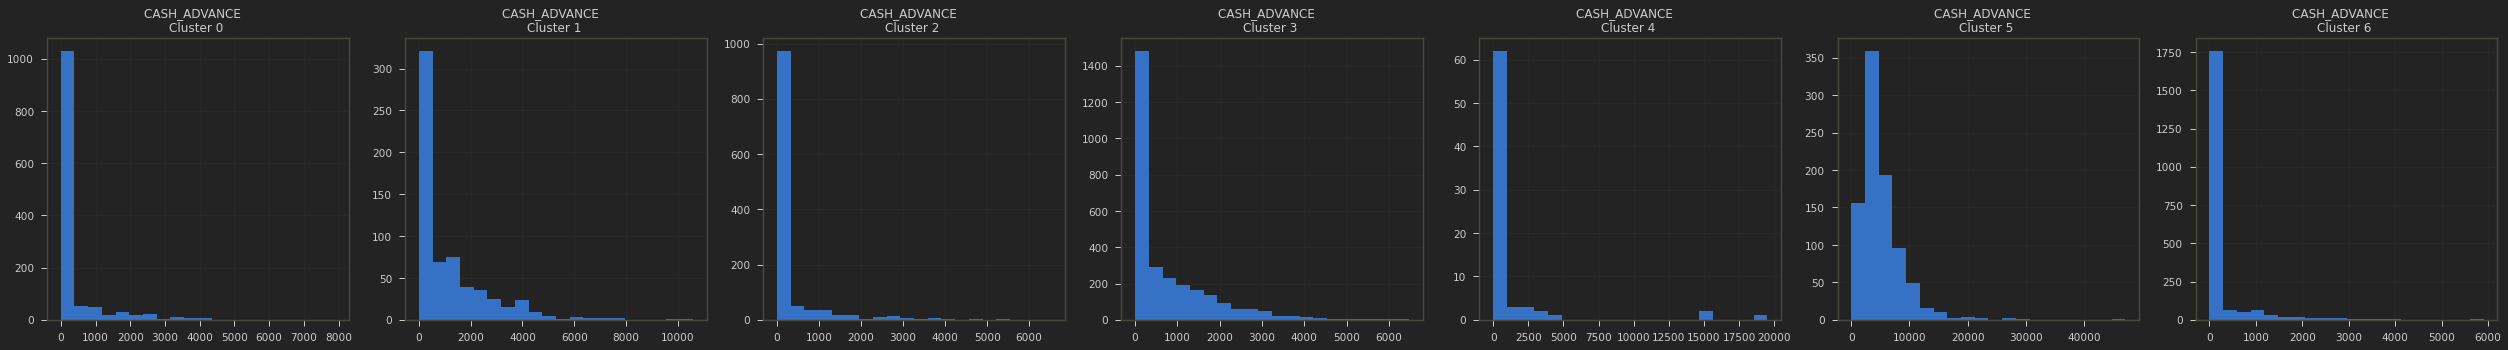

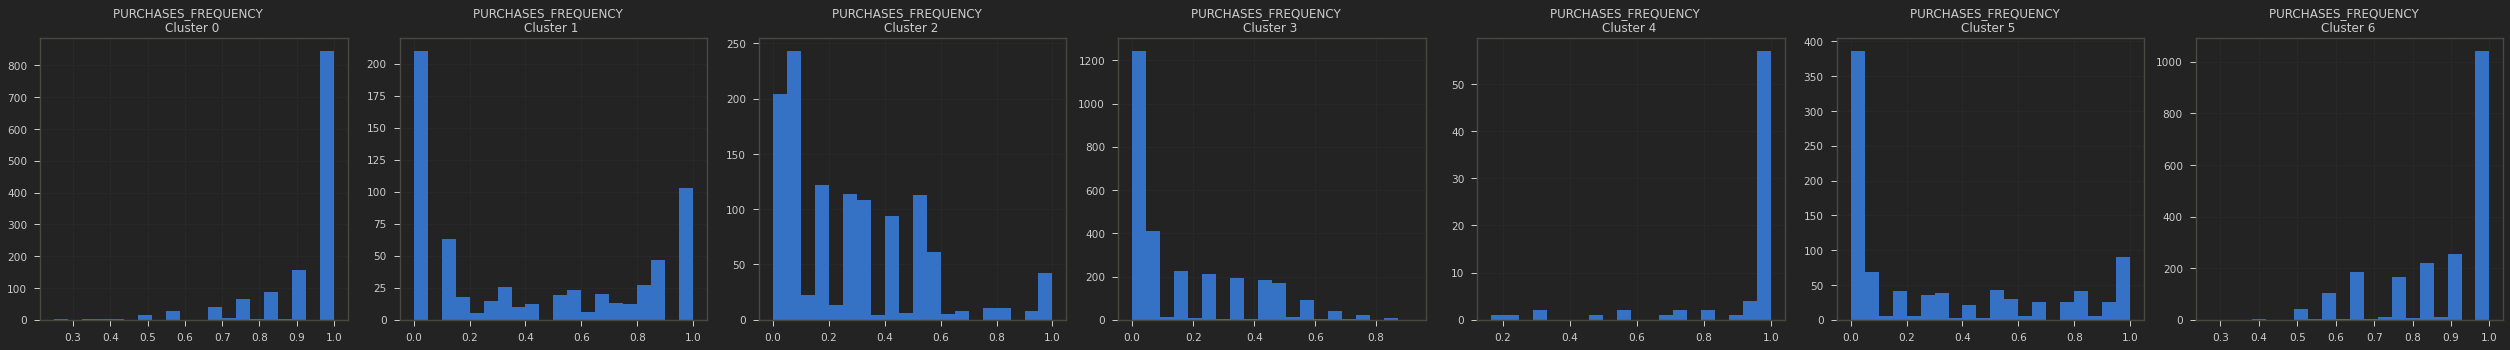

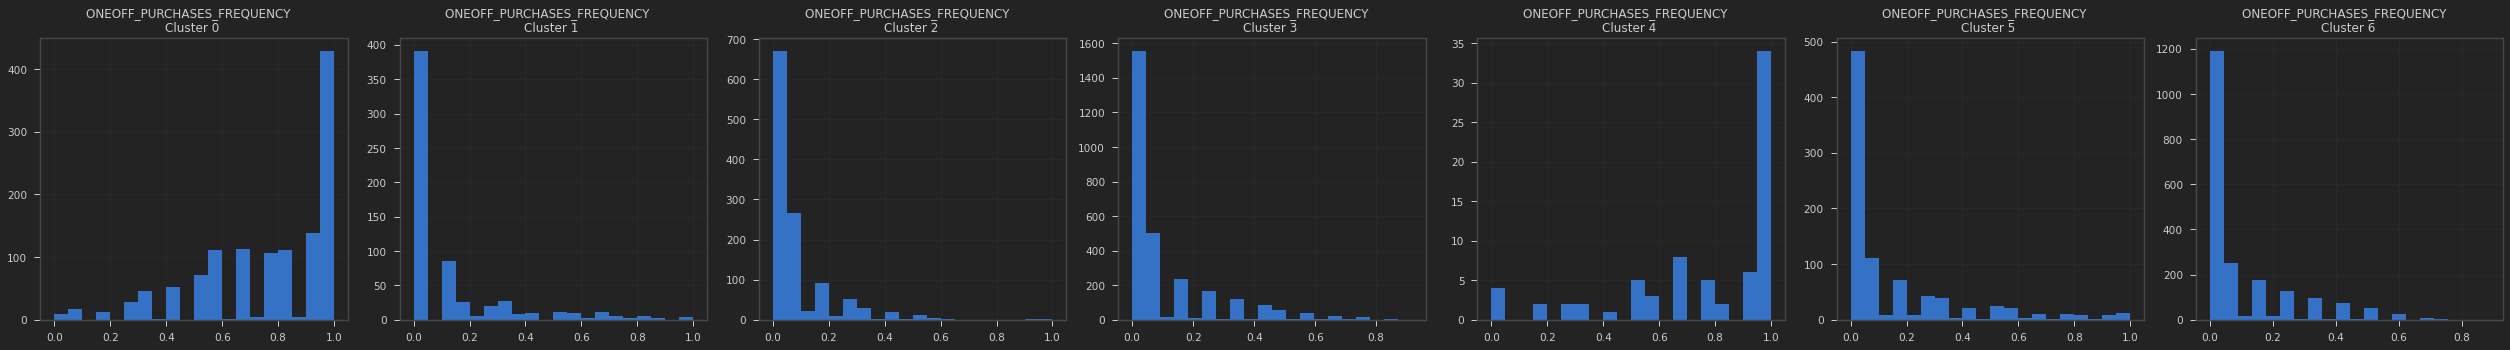

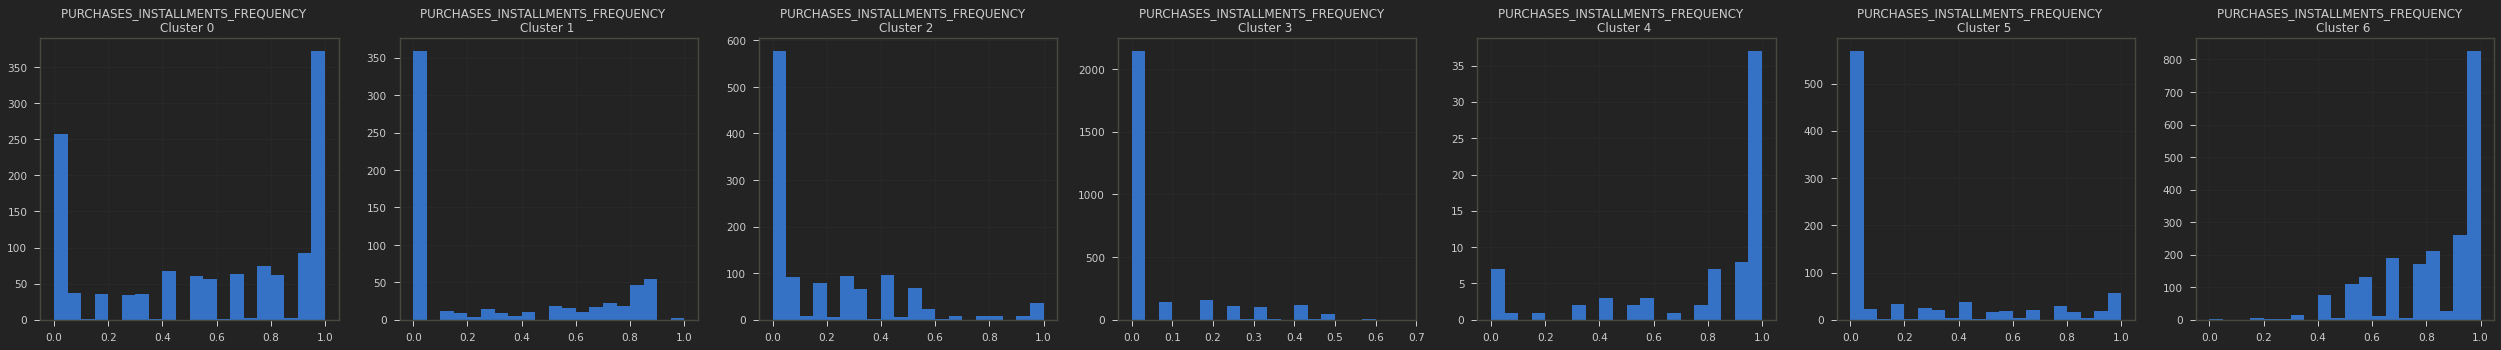

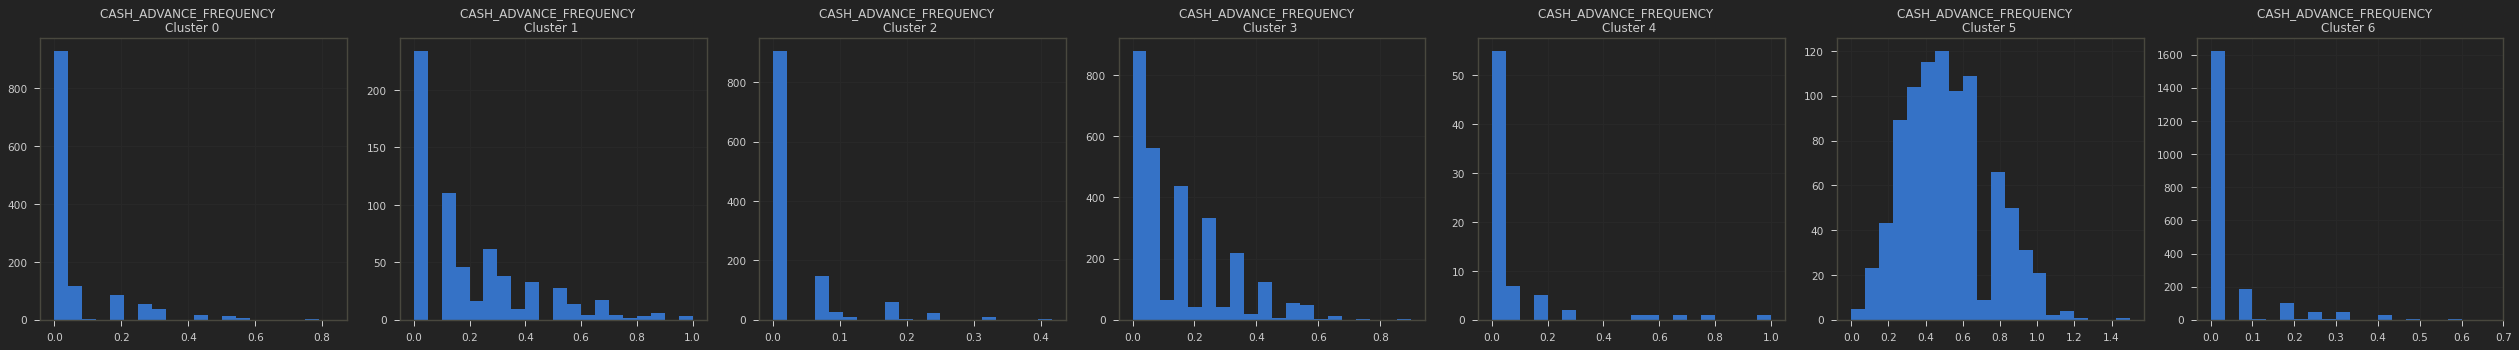

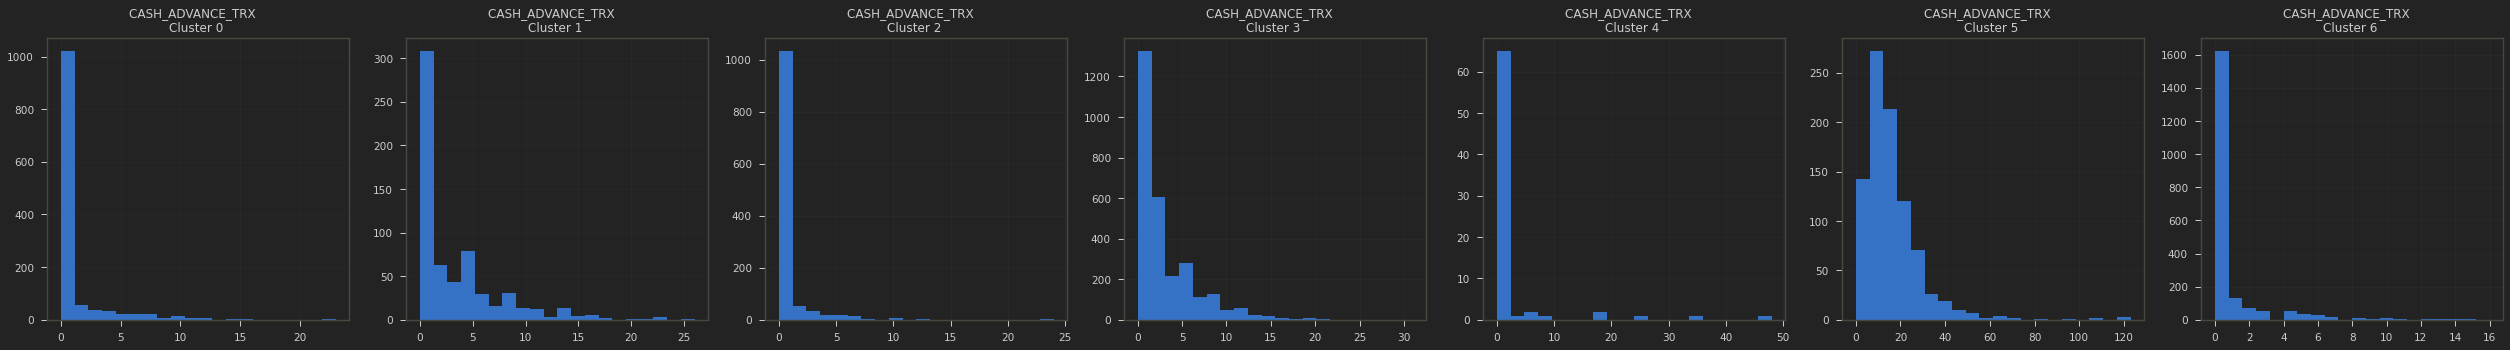

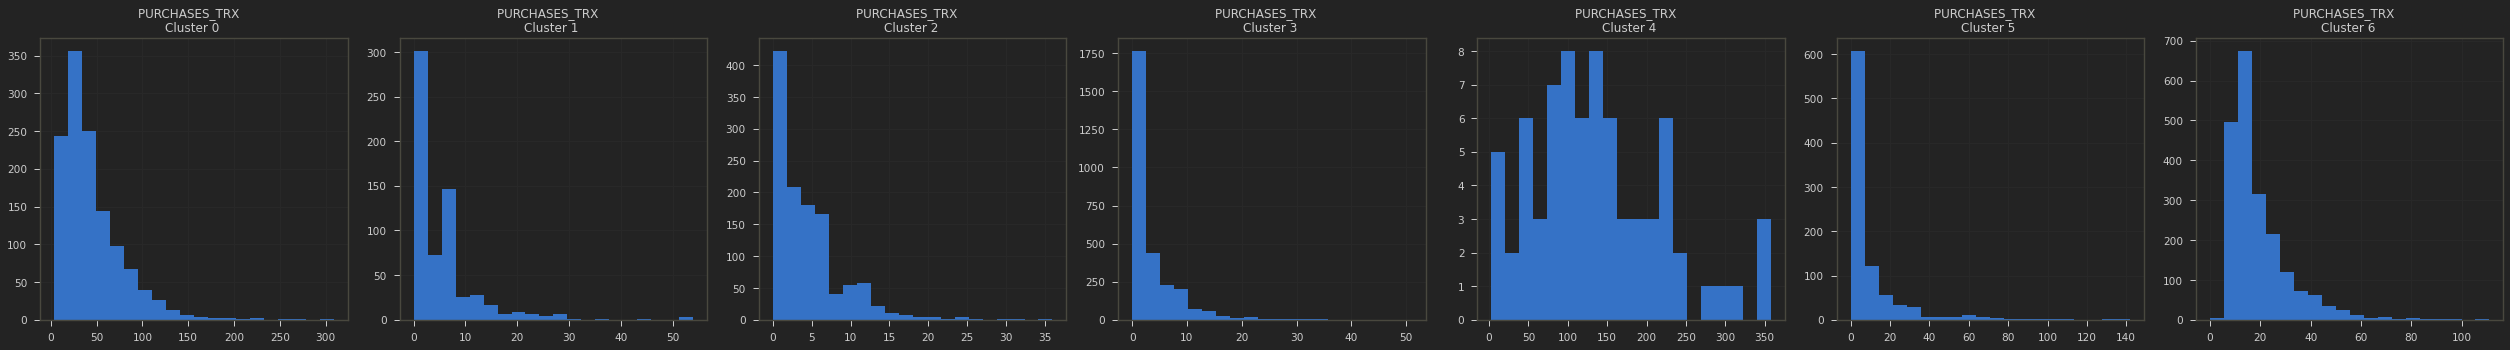

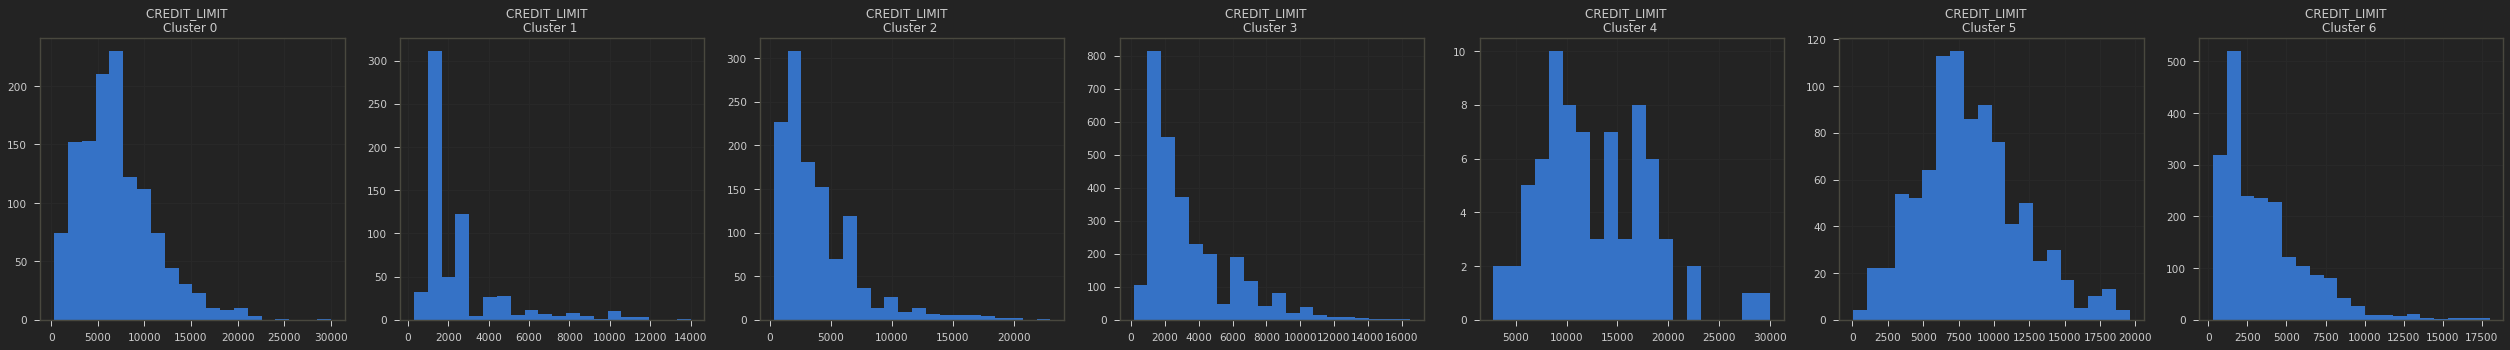

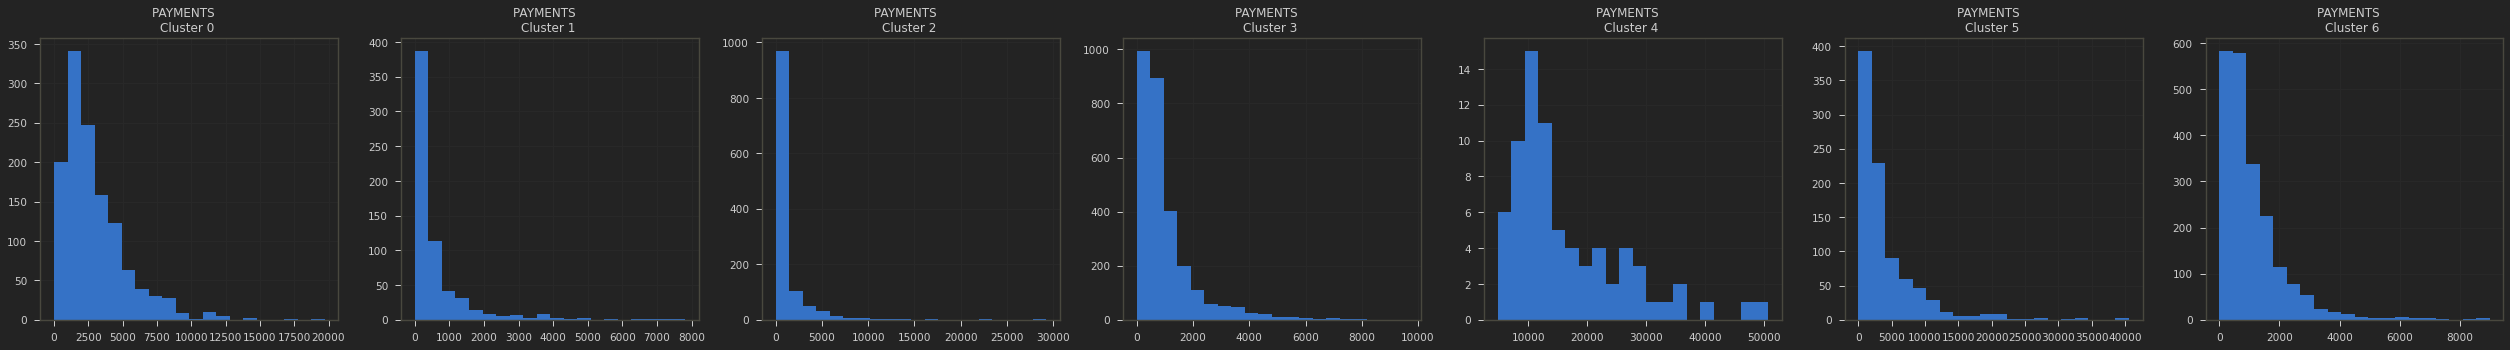

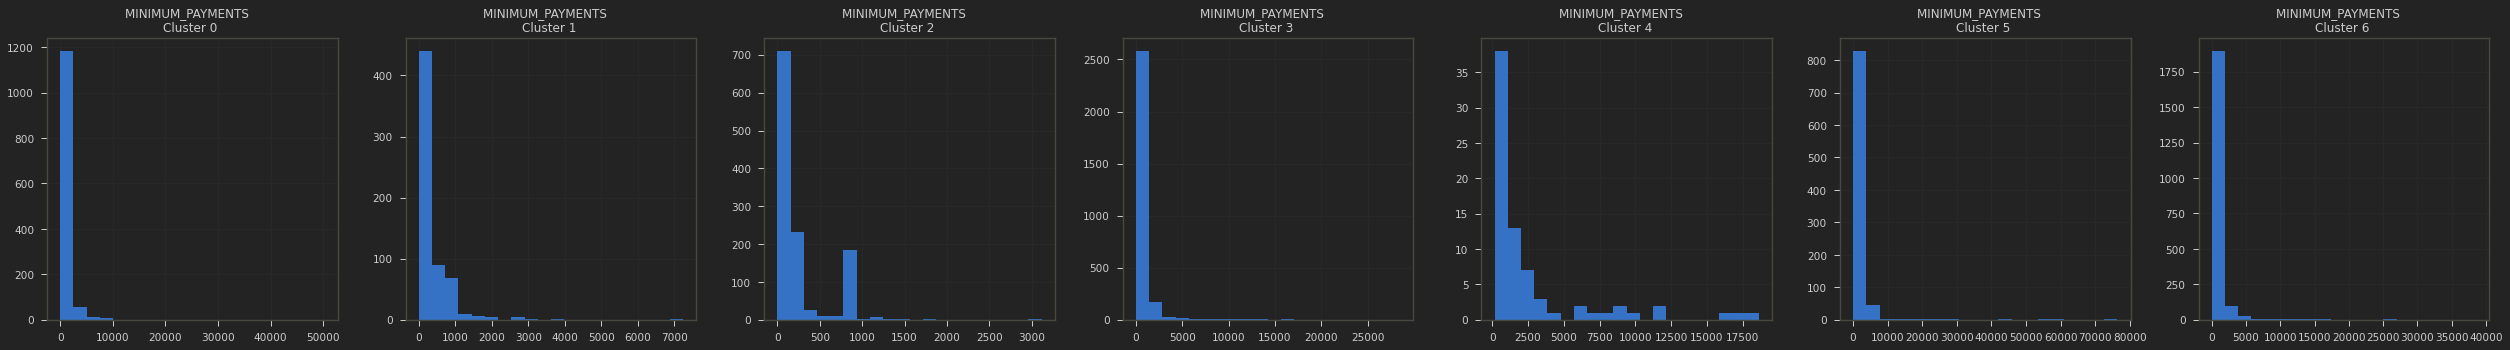

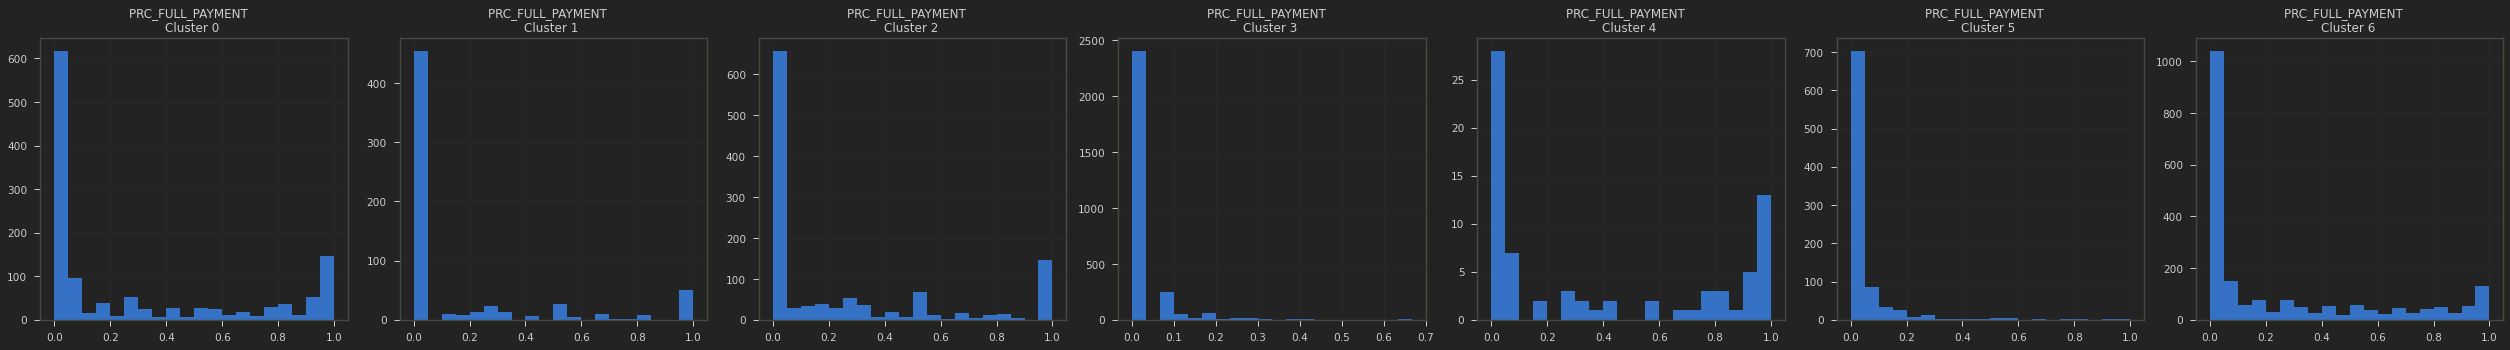

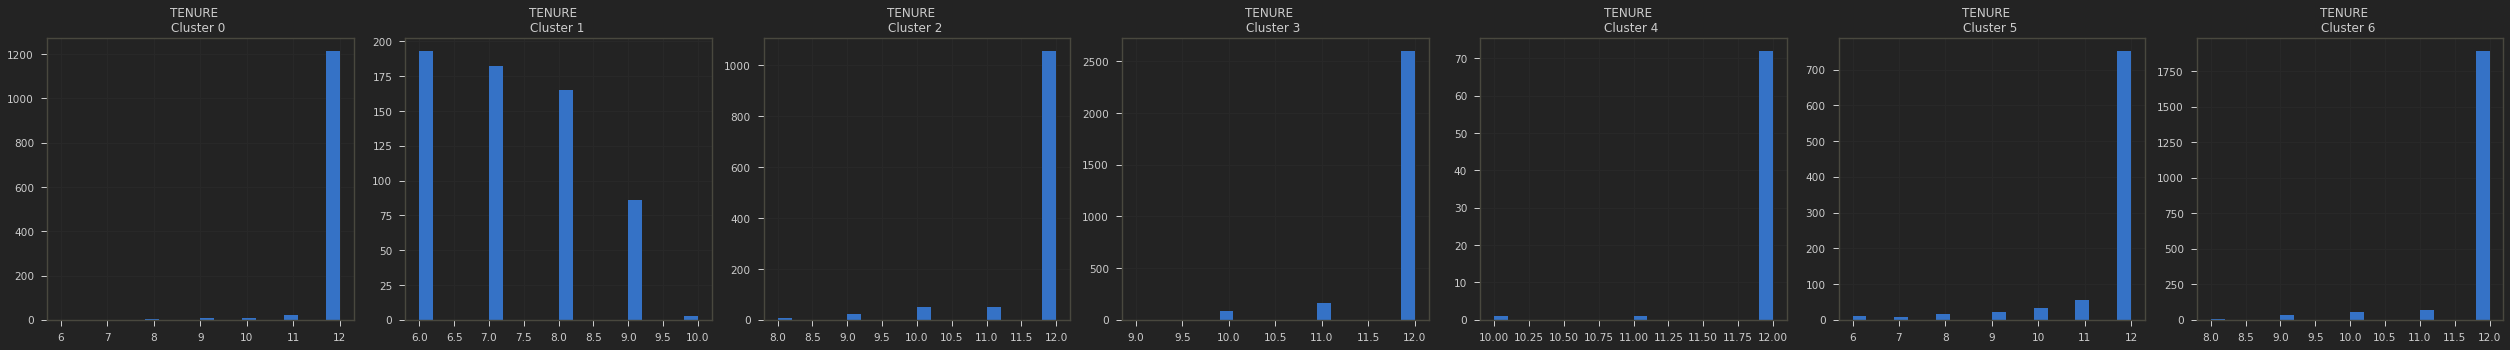

In [31]:
for i in creditcard_df.columns:
    plt.figure(figsize = (35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster= creditcard_df_cluster[creditcard_df_cluster['cluster'] ==j]
        cluster[i].hist(bins=20)
        plt.title('{}   \nCluster {} '.format(i,j))
    plt.show()

DIMENSIONALITY REDUCTION USING PCA

In [32]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.682215  , -1.07645375],
       [-1.13828896,  2.50646703],
       [ 0.96968729, -0.38352246],
       ...,
       [-0.92620111, -1.81078381],
       [-2.33654851, -0.65796555],
       [-0.55642931, -0.40046429]])

In [33]:
pca_df= pd .DataFrame(data=principal_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682215,-1.076454
1,-1.138289,2.506467
2,0.969687,-0.383522
3,-0.873621,0.043159
4,-1.599430,-0.688581


In [34]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682215,-1.076454,3
1,-1.138289,2.506467,5
2,0.969687,-0.383522,0
3,-0.873621,0.043159,3
4,-1.599430,-0.688581,3


SCATTER PLOT

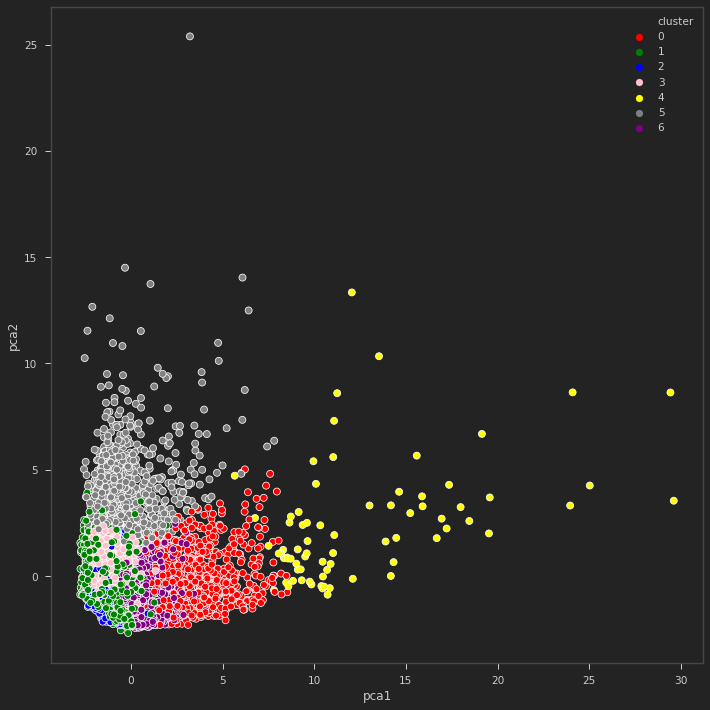

In [35]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1",y="pca2", hue= "cluster", data=pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()